In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [28]:
from sklearn.datasets import load_diabetes

In [29]:
data = load_diabetes()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [32]:
N, D = X_train.shape

In [33]:
N, D

(296, 10)

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D, )),
    tf.keras.layers.Dense(1)
])

In [35]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D, )))

In [36]:
model.compile(optimizer="adam",
              loss="mse")

In [43]:
def scheduler(epoch):
  if epoch >= 10000:
    return 0.01
  return 0.1

scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [49]:
class Callback(tf.keras.callbacks.Callback):
    SHOW_NUMBER = 1000
    counter = 0
    epoch = 0

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch = epoch

    def on_train_batch_end(self, batch, logs=None):
        if self.counter == self.SHOW_NUMBER or self.epoch == 1:
            print('Epoch: ' + str(self.epoch) + ' loss: ' + str(logs['loss']))
            if self.epoch > 1:
                self.counter = 0
        self.counter += 1

In [51]:
out_batch = Callback()
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[scheduler, out_batch], epochs=50000, verbose=0)

Epoch: 1 loss: 2755.23583984375
Epoch: 1 loss: 2254.34375
Epoch: 1 loss: 2239.0
Epoch: 1 loss: 2506.235107421875
Epoch: 1 loss: 2738.584716796875
Epoch: 1 loss: 2872.218505859375
Epoch: 1 loss: 2979.098876953125
Epoch: 1 loss: 3062.30615234375
Epoch: 1 loss: 3137.0498046875
Epoch: 1 loss: 3140.94189453125
Epoch: 100 loss: 2189.163818359375
Epoch: 200 loss: 4140.896484375
Epoch: 300 loss: 2976.03857421875
Epoch: 400 loss: 2820.25
Epoch: 500 loss: 1397.46630859375
Epoch: 600 loss: 2498.49658203125
Epoch: 700 loss: 1882.3857421875
Epoch: 800 loss: 2653.0458984375
Epoch: 900 loss: 3135.40087890625
Epoch: 1000 loss: 2773.4140625
Epoch: 1100 loss: 3098.547607421875
Epoch: 1200 loss: 3088.736328125
Epoch: 1300 loss: 2767.02490234375
Epoch: 1400 loss: 2299.474365234375
Epoch: 1500 loss: 2149.083251953125
Epoch: 1600 loss: 2820.5927734375
Epoch: 1700 loss: 3163.33740234375
Epoch: 1800 loss: 2877.6748046875
Epoch: 1900 loss: 2926.509765625
Epoch: 2000 loss: 4410.8994140625
Epoch: 2100 loss: 3220

In [19]:
print(f"Train Score: {model.evaluate(X_train, y_train)}")
print(f"Test Score: {model.evaluate(X_test, y_test)}")

10/10 [==============================] - 0s 2ms/step - loss: 2826.7434
Train Score: 2826.743408203125
5/5 [==============================] - 0s 2ms/step - loss: 3058.8665
Test Score: 3058.866455078125


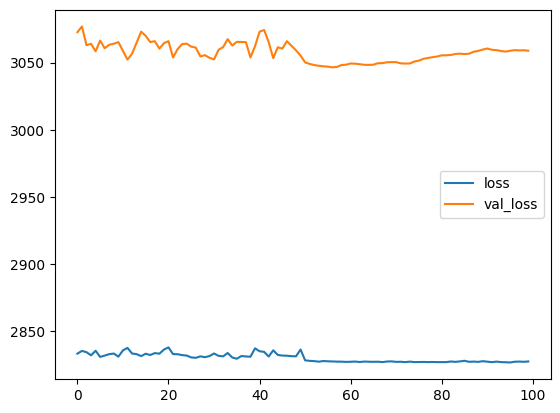

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

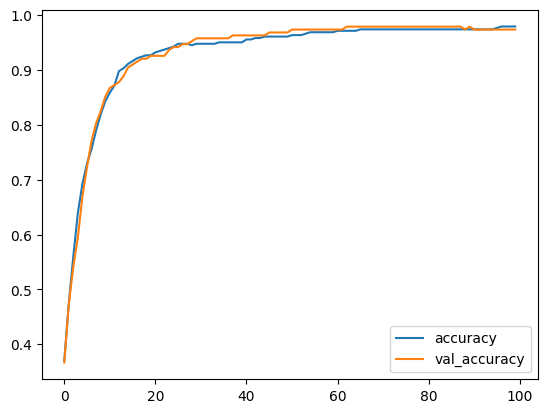

In [ ]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

In [53]:
Yhat = model.predict(X_test).flatten()

5/5 [==============================] - 0s 3ms/step


In [54]:
w, b = model.layers[0].get_weights()
Yhat2 = (X_test.dot(w) + b).flatten()
import numpy as np
np.allclose(Yhat, Yhat2)

True